# Quantum Poker
This game and the Jupyter Notebook accompanying it aim to serve as an introduction to how quantum logic gates operate on qubits, and to basic properties of entanglement and superposition. These phenomena seem to be crucial to get anything new and useful out of quantum computing.

The notebook starts by introducing the game, moves on to showing the start screen and giving some pointers on strategy, and finally it finishes the  game of Quantum Poker begun in Input [2].

 ## Intro
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this quantum version of poker, the players are initially dealt a __hand__ which consists of things called quantum gates. That is, everyone gets three quantum gates and no one knows exactly which gates the other players got. Furthermore, each player has their own personal set of five qubits that serve as the "__community cards__" on the table. These qubits will be _measured_ at the end of the game, and you either _measure_ a $1$ or a $0$. Admittedly, this sounds just like a normal bit. A bit can _be_ either $1$, corresponding to ``ON`` (letting current through a transistor), or $0$, corresponding to ``OFF`` (not letting current through). Note the language usage here: the difference between _measuring_ $1$ and _being_ $1$ will become important. The qubits will look the same for all the players at first, but you will get a chance to manipulate your personal qubits before they are measured.
  #### _Goal_
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The __goal__ is to measure as many $1$’s as possible at the end of the game. In order to do that, you have to apply the quantum gates from your hand to change the measurement outcomes. This happens right after the rounds of betting are finished. Incidentally, betting is done as in normal Texas hold 'em poker.
  #### _Quantum weirdness_
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now, why is _measurement_ so important? This is where the "quantum" in Quantum Poker comes in. You might have heard the following paraphrased statement: 
> The weird thing about the quantum world is that if you aren't looking, anything goes.

So: yes, when you _measure_ ("look at") your qubits you get either a $0$ or a $1$, but _before_ you measure them, they can - in a way - _be_ __both $0$ and $1$ at the same time__. We say that the qubit _is_ in a state of __superposition__, and if you _measure_ it you find either $1$ or $0$. In this case you can't tell whether you will measure a $0$ or a $1$, and oftentimes all you know is that if you measure a qubit, you will get $1$ with some probability and $0$ with some probability. Fortunately, you as a player can affect your personal qubits using the quantum gates in your hand. Therefore, any player who has not folded by the end of a game should apply their gates in such a way that each qubit has a high probability of yielding $1$ when measured. We will get back to the specifics of this later.

## Playing the game
First we need to import the required functions and set up the starting conditions for the game.

In [2]:
%matplotlib inline
from os.path import dirname, abspath
import sys
sys.path.append(dirname(abspath('')))
from PokerGame import PokerGame
import matplotlib.pyplot as plt
from numpy import array

nPlayers = 3
deckOfGates = {"H": nPlayers, "X": nPlayers, "ZH": nPlayers, "CX": nPlayers}
money = array([100 for i in range(nPlayers)])
names = ["James", "Lilly", "Harry"]

Now we can create the board. Here we have three players, James, Lilly, and Harry. In this round, James is small blind and Lilly is big blind, so they have already put money on the table. To the right in the output below, we can see the gates available in the "deck" that the players have been dealt from. For now, there are no qubits on the table, as the first three are shown _after_ the first round of betting. They will appear in the blue boxes labeled 1, 2, ..., 5.

A player can choose to either check/call or fold by pressing the corresponding button or raise by entering a self-determined amount into the text box and hitting the enter button during their turn. For a more detailed description, please read a guide on poker rules (Texas hold 'em).

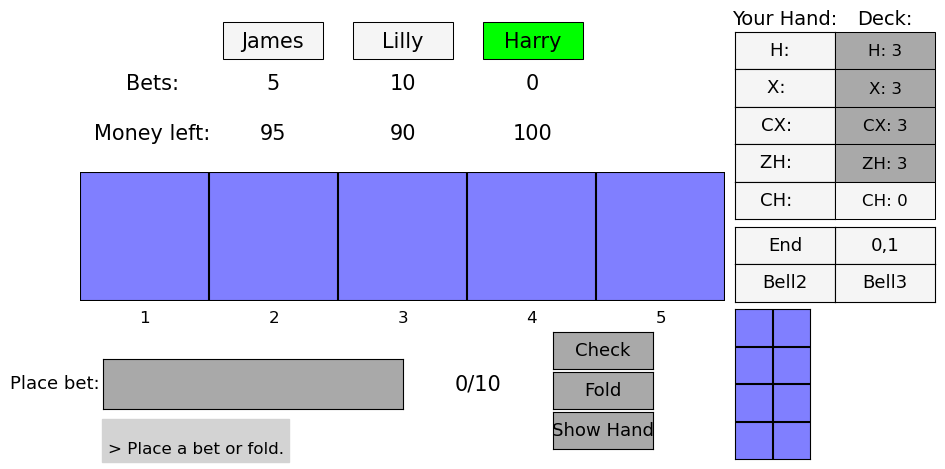

In [26]:
pokerGame = PokerGame(deckOfGates, nPlayers, money, names = names, smallBlind=5, smallBlindPlayer=0, seed=4,
                     enableEntanglement=True)
fig = pokerGame.interactive.fig

Before choosing whether to join in on the game, it could be a good idea to look at your hand to see which cards (quantum gates!) you've been dealt. Harry does this by clicking the Show Hand button and looking at the buttons to the right. The total amount of each type in the deck is shown in the column to the right and Harry's cards are to the left.

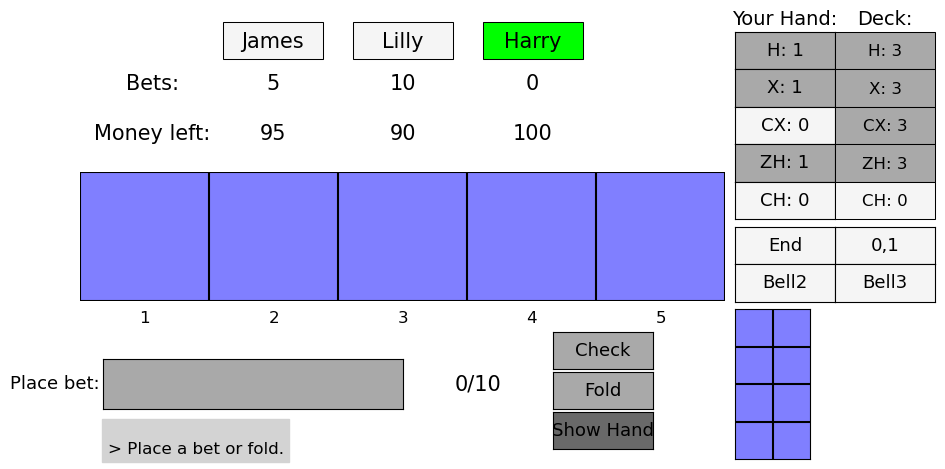

In [27]:
pokerGame.interactiveButtons.showHand(None, updateBoard=False)
fig

Before choosing what to do, he also inspects the deck of cards his cards came from. We see that the other players probably have some ZH gates (phase flip Z, then Hadamard H). How gates work will be explained shortly. 

Harry chooses to fold and below we see James's hand:

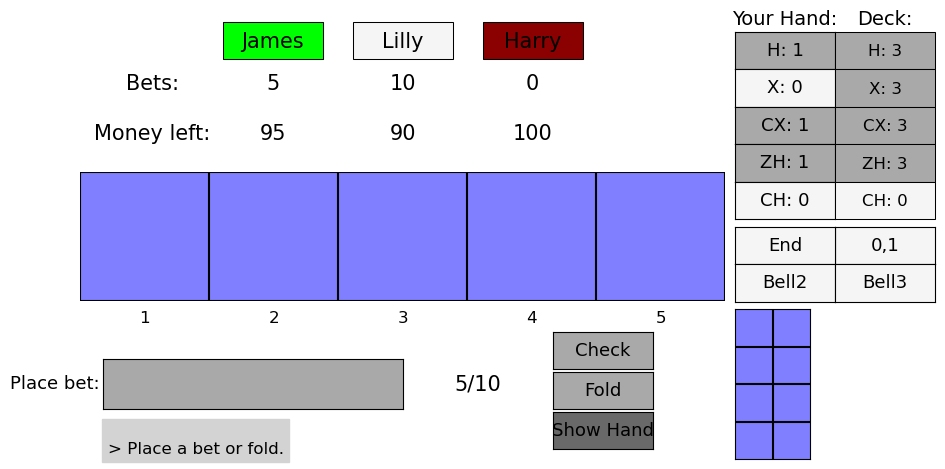

In [28]:
pokerGame.fold()
pokerGame.interactiveButtons.showHand(None, updateBoard=False)
fig

Both James and Lilly choose to check after looking at their hands. In the figure below, a new betting round has started, which is why qubits 1 through 3 have appeared. We can now talk more about the difference between _being_ $1$ and _measuring_ $1$. It is a fact that if you _measure_ a qubit to be $1$, it will indeed _be_ $1$ if you measure it again afterwards. To talk about this in more specific terms, physicists use the so-called bra-ket notation. Here, if a qubit really _is_ $1$, we say that it _is in the state_ $|1\rangle$. Or, similarly, if it has been measured to be $0$ it will be in the state $|0\rangle$ afterwards. Qubits can, as explained, be in other states than $1$ and $0$, and this must be the case for qubit 2 below. The text in bold tells us that if you measure qubit 2, there is a $50\%$ chance to get $1$. It will turn out to be entangled with qubit 5, but more on that later.

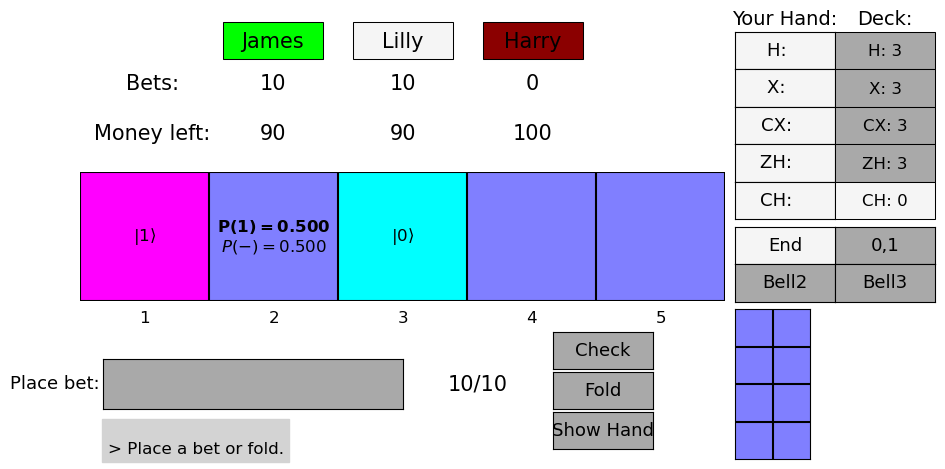

In [29]:
pokerGame.check()
pokerGame.check()
fig

James is feeling lucky and chooses to raise by 10:

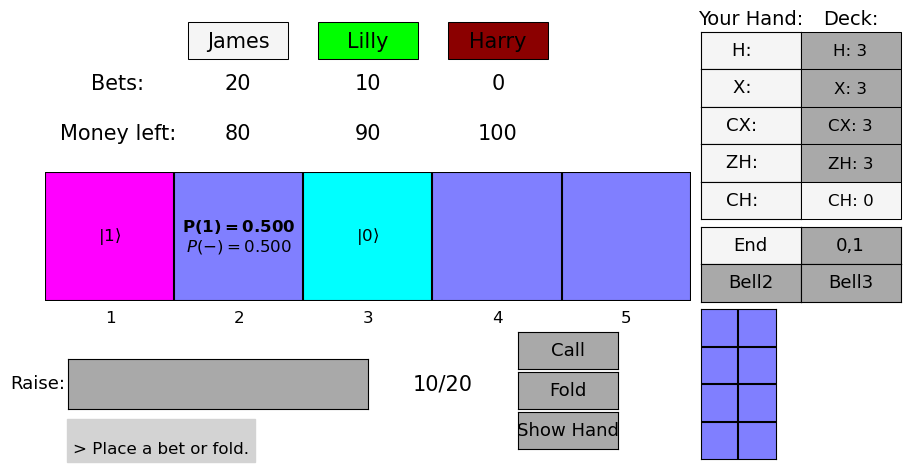

In [30]:
pokerGame.bet(10)
fig

Below, two qubits have appeared. Qubit 4 is in the state $|-\rangle$. This is a __uniform__ superposition defined as $|-\rangle = |0\rangle - |1\rangle$. A similar uniform superposition is $|+\rangle = |0\rangle + |1\rangle$. Uniform here means that the probabilities of measuring $1$ and $0$ are equal, i.e. $50\%$. In order to improve your chances, you can try to apply gates to increase the probability of measuring $1$. In the case of $|-\rangle$, applying the Hadamard gate, H, to the qubit will leave it in the state $|1\rangle$ - exactly what we wanted! We write this action like so: $H|-\rangle = |1\rangle$.

__Note__: 
* The phase flip gate Z can do this: $Z|+\rangle = |-\rangle$, so if you have a $|+\rangle$ you can apply Z then H to get $|1\rangle$.
* The ZH gate applies Z first, then H, meaning you can turn a $|+\rangle$ directly into a $|1\rangle$.
* The X gate NOTs: $X|0\rangle$ = $|1\rangle$ and $X|1\rangle = |0\rangle$.

Lilly stays in the game and calls the bet. They both check on the third round of betting, and it is now James's turn. This is the last betting round before they apply their quantum gates. 

James is curious about which two-qubit state qubits 2 and 5 are in. Therefore, he clicks the Bell2 button, and then on qubit 2 then 5.

__Note__:
* A two-qubit state can be written as $|q_1 q_2\rangle$ where $|q_1\rangle$ is the state of the first qubit, and $|q_2\rangle$ is the state of the second. For example, writing the state of two qubits as $|10\rangle$ means that the first qubit is in the state $|1\rangle$ and second qubit is in the state $|0\rangle$.

"Pair A" on qubits 2 and 5 below means they are in one of the Bell states, they are __entangled__. The boxes on the bottom right tell us that they are in the state $|00\rangle - |11\rangle$ (ignoring normalization) with a probability of $1$. Therefore, when you measure the particles, they will either be in the state $|00\rangle$ or $-|11\rangle$ (corresponding to $|11\rangle$, the phase of the state after measurement is without physical significance). This means measuring one of the qubits to be, say, $1$ immediately tells you that the _other_ qubit measures to $1$, too. Measuring $0$ means the other measures to $0$. 

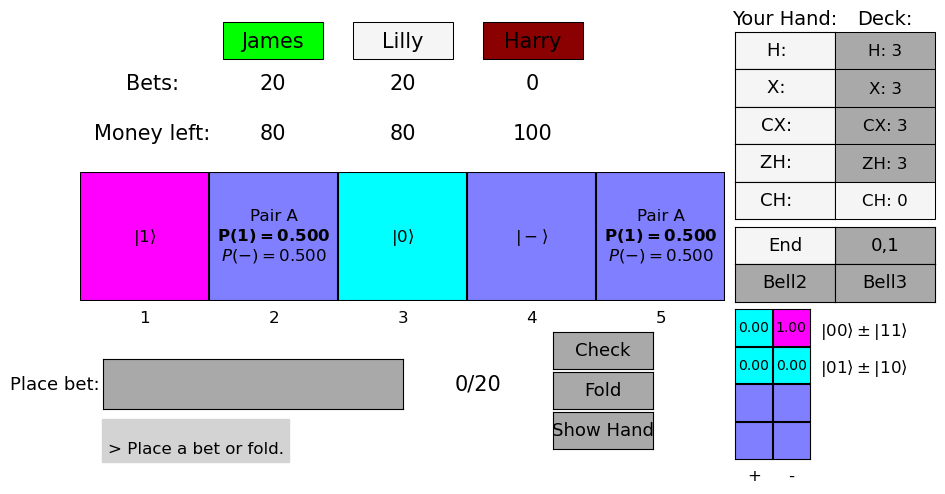

In [31]:
pokerGame.check()
pokerGame.check()
pokerGame.check()
pokerGame.interactiveButtons.checkBellStates2(None)
pokerGame.mouseClick(1)
pokerGame.mouseClick(4)
fig

Lilly and James don't bet during the last round. The betting rounds are over and they can apply as many of their quantum gates as they wish.

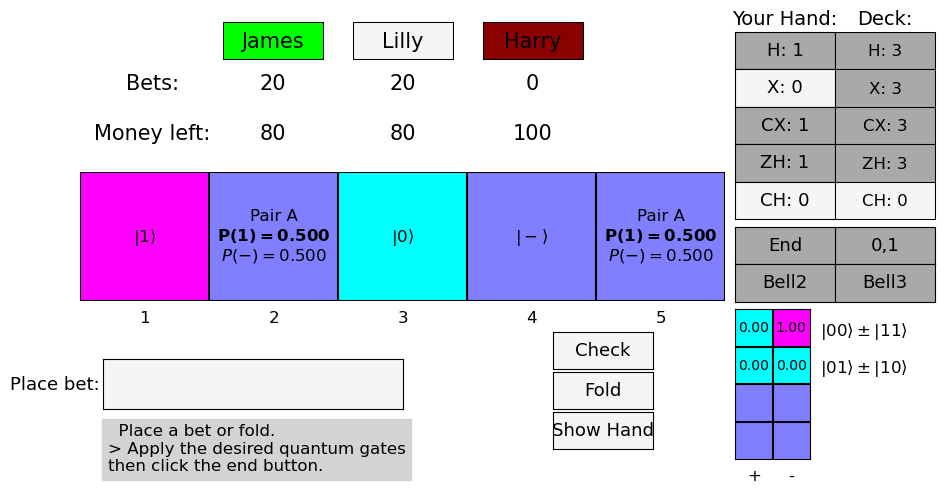

In [32]:
pokerGame.check()
pokerGame.check()
fig

James wants to disentangle the Bell pair, so he applies his controlled NOT gate, CX, to 2 then 5. This will NOT qubit 5 if qubit 1 is $1$. The resulting state looks like this:

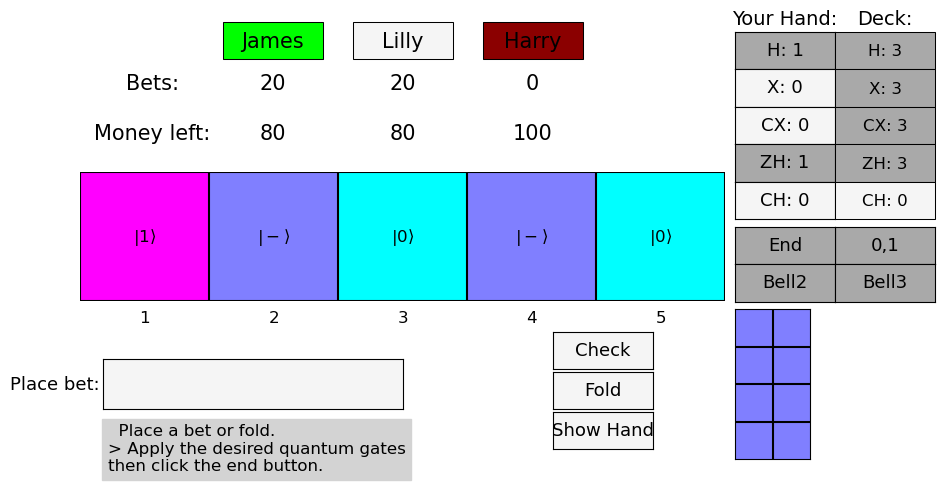

In [33]:
pokerGame.interactiveButtons.CX(None)
pokerGame.mouseClick(1)
pokerGame.mouseClick(4)
fig

Aha! We have found a way to disentangle Bell pairs: Just apply the CX gate. (This is because to _create_ a Bell pair, you apply a CX gate in the final step. Applying a CX gate twice in a row is the same as doing nothing, it is its own inverse).

James now NOTs qubit 3 making it come out as $1$ in the measurement. He then proceedes to apply the ZH gate to qubit 5, making its probability of yielding $1$ increase from $0\%$ to $50\%$.

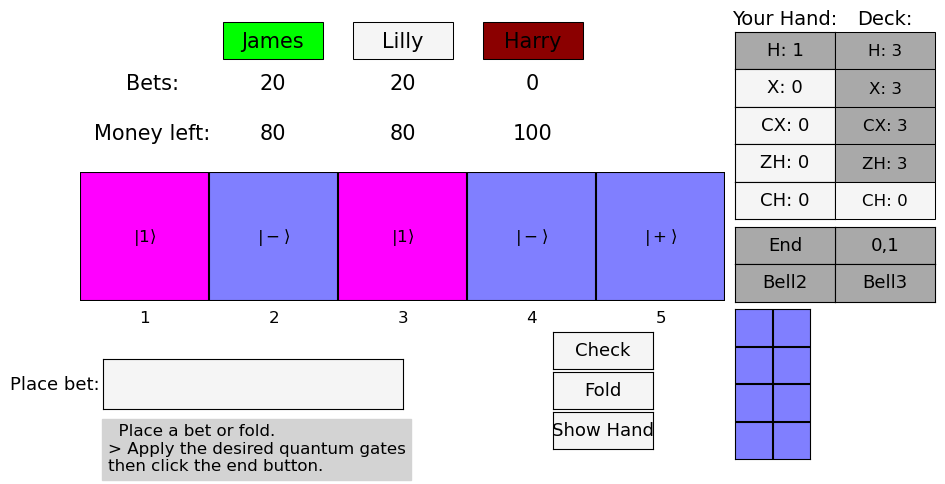

In [ ]:
pokerGame.interactiveButtons.X(None)
pokerGame.mouseClick(2)
pokerGame.interactiveButtons.ZH(None)
pokerGame.mouseClick(4)
fig

James now clicks the End button, making it Lilly's turn.

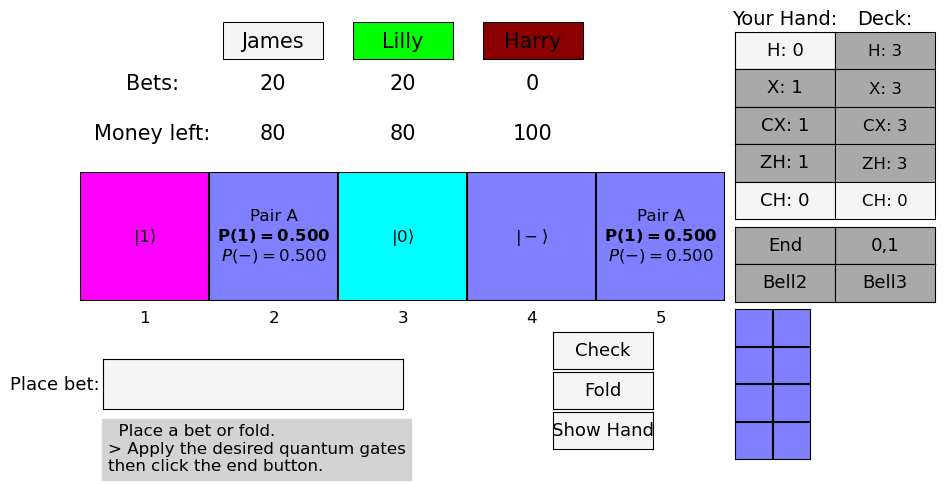

In [36]:
pokerGame.endGateTurn(None)
fig

Lilly NOTs qubit 3 and uses the Hadamard gate on qubit 4. She would need a CX gate to unentangle pair A.

In [ ]:
pokerGame.interactiveButtons.X(None)
pokerGame.mouseClick(2)
pokerGame.interactiveButtons.H(None)
pokerGame.mouseClick(3)
fig

KeyError: 'X'

Lilly ends her turn and all the qubits are measured. You can check would happen if Lilly applied the ZH gate to one of the qubits in pair A.

In [ ]:
pokerGame.endGateTurn(None)
fig

Depending on what the measurements yielded, either James, Lilly or both win the game. In the full version of the game, the winnings are brought to the next game at the end of each game until everyone but one person runs out of money. You can try an interactive version of the game run from a Jupyter Notebook [here](https://github.com/sintefmath/QuantumPoker/blob/vemfal-patch-1/runInteractivePokerJN.ipynb). You will have to download the notebook, Qiskit and Quantum Poker itself.